In [21]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
import itk
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import json
import matplotlib
import copy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_fpath = 'all_biomarkers_correct2.csv'

In [6]:
df = pd.read_csv(file_fpath)


In [7]:
df

,Unnamed: 0,PatID,Torso-V,Lung-V,Vessel-V,Density85,alpha,beta,DLCOc,FEV1,FVC,TLC,DLCOcPP,FEV1PP,FVCPP,TLCPP
0,0,68800,18.062328,5.261078,0.448335,-772.0,-1.0730,9.5845,7.102,3.491,4.363,6.261,83.0,111.0,108.0,95.0
1,1,127512,16.196190,3.332836,0.348448,-666.0,-1.0994,9.3001,3.943,1.575,2.076,3.864,68.0,87.0,88.0,87.0
2,2,139552,19.561760,6.198380,0.246648,-797.0,-1.4488,10.4260,5.273,2.626,3.544,5.781,73.0,112.0,115.0,105.0
3,3,143788,21.084000,3.890805,0.642647,-504.0,-1.3389,10.9858,1.240,2.260,2.860,3.970,17.0,89.0,87.0,71.0
4,4,152440,22.894444,4.137601,0.193715,-773.0,-1.5033,10.1955,7.102,2.402,2.994,4.525,110.0,104.0,101.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,312,9523013,22.628491,5.512411,0.509352,-679.0,-1.4441,10.7688,6.741,3.492,4.117,5.214,60.0,82.0,80.0,66.0
310,313,9662556,19.240669,4.372667,0.205895,-710.0,-1.7964,11.0830,6.551,3.666,4.340,5.188,78.0,102.0,102.0,90.0
311,314,9861781,23.546867,5.094377,0.542153,-743.0,-1.1365,10.2187,5.380,3.870,4.900,6.120,56.0,100.0,100.0,86.0
312,315,9934096,13.237088,4.721426,0.240975,-815.0,-1.3998,10.0091,4.800,2.057,2.706,4.673,79.0,99.0,102.0,101.0


In [9]:
for i in df.iterrows():
    print(i)

(0, Unnamed: 0        0.000000
PatID         68800.000000
Torso-V          18.062328
Lung-V            5.261078
Vessel-V          0.448335
Density85      -772.000000
alpha            -1.073000
beta              9.584500
DLCOc             7.102000
FEV1              3.491000
FVC               4.363000
TLC               6.261000
DLCOcPP          83.000000
FEV1PP          111.000000
FVCPP           108.000000
TLCPP            95.000000
Name: 0, dtype: float64)
(1, Unnamed: 0         1.000000
PatID         127512.000000
Torso-V           16.196190
Lung-V             3.332836
Vessel-V           0.348448
Density85       -666.000000
alpha             -1.099400
beta               9.300100
DLCOc              3.943000
FEV1               1.575000
FVC                2.076000
TLC                3.864000
DLCOcPP           68.000000
FEV1PP            87.000000
FVCPP             88.000000
TLCPP             87.000000
Name: 1, dtype: float64)
(2, Unnamed: 0         2.000000
PatID         139552.000000
To

In [10]:
def get_test_data(split_id='7957098'):
    

,Unnamed: 0,PatID,Torso-V,Lung-V,Vessel-V,Density85,alpha,beta,DLCOc,FEV1,FVC,TLC,DLCOcPP,FEV1PP,FVCPP,TLCPP
0,0,68800,18.062328,5.261078,0.448335,-772.0,-1.0730,9.5845,7.102,3.491,4.363,6.261,83.0,111.0,108.0,95.0
1,1,127512,16.196190,3.332836,0.348448,-666.0,-1.0994,9.3001,3.943,1.575,2.076,3.864,68.0,87.0,88.0,87.0
2,2,139552,19.561760,6.198380,0.246648,-797.0,-1.4488,10.4260,5.273,2.626,3.544,5.781,73.0,112.0,115.0,105.0
3,3,143788,21.084000,3.890805,0.642647,-504.0,-1.3389,10.9858,1.240,2.260,2.860,3.970,17.0,89.0,87.0,71.0
4,4,152440,22.894444,4.137601,0.193715,-773.0,-1.5033,10.1955,7.102,2.402,2.994,4.525,110.0,104.0,101.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,312,9523013,22.628491,5.512411,0.509352,-679.0,-1.4441,10.7688,6.741,3.492,4.117,5.214,60.0,82.0,80.0,66.0
310,313,9662556,19.240669,4.372667,0.205895,-710.0,-1.7964,11.0830,6.551,3.666,4.340,5.188,78.0,102.0,102.0,90.0
311,314,9861781,23.546867,5.094377,0.542153,-743.0,-1.1365,10.2187,5.380,3.870,4.900,6.120,56.0,100.0,100.0,86.0
312,315,9934096,13.237088,4.721426,0.240975,-815.0,-1.3998,10.0091,4.800,2.057,2.706,4.673,79.0,99.0,102.0,101.0


In [14]:
def split_dataframe(df, split_id):
    # 找到split_id在ID列中对应的行索引
    idx = df[df['PatID'] == split_id].index[0]
    # 创建新的DataFrame，从idx开始到最后的所有行
    new_df = df.iloc[idx:]
    # 返回新的DataFrame
    return new_df


In [20]:
b = split_dataframe(df=df, split_id=7957098)

In [18]:
b

,Unnamed: 0,PatID,Torso-V,Lung-V,Vessel-V,Density85,alpha,beta,DLCOc,FEV1,FVC,TLC,DLCOcPP,FEV1PP,FVCPP,TLCPP
252,254,7957098,17.632905,4.093446,0.277098,-735.0,-1.2838,9.9287,9.205,3.635,4.555,5.352,118.0,116.0,117.0,90.0
253,255,7977032,19.482694,5.714108,0.502973,-824.0,-1.1988,9.8084,5.710,2.810,3.950,5.840,82.0,110.0,121.0,111.0
254,256,8077626,16.100762,5.226167,0.551455,-794.0,-1.0885,9.5746,5.433,2.741,3.642,5.658,73.0,98.0,103.0,102.0
255,257,8160998,19.889008,5.522286,0.540149,-764.0,-1.1440,9.8632,4.094,2.878,4.059,6.578,54.0,99.0,110.0,118.0
256,258,8189796,21.674374,4.004839,0.388537,-675.0,-1.1954,10.0782,5.301,2.629,3.568,5.139,68.0,91.0,97.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,312,9523013,22.628491,5.512411,0.509352,-679.0,-1.4441,10.7688,6.741,3.492,4.117,5.214,60.0,82.0,80.0,66.0
310,313,9662556,19.240669,4.372667,0.205895,-710.0,-1.7964,11.0830,6.551,3.666,4.340,5.188,78.0,102.0,102.0,90.0
311,314,9861781,23.546867,5.094377,0.542153,-743.0,-1.1365,10.2187,5.380,3.870,4.900,6.120,56.0,100.0,100.0,86.0
312,315,9934096,13.237088,4.721426,0.240975,-815.0,-1.3998,10.0091,4.800,2.057,2.706,4.673,79.0,99.0,102.0,101.0


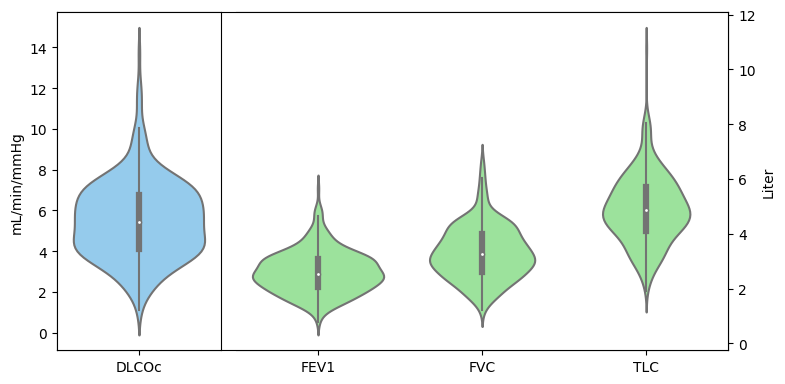

In [78]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 选取需要的两列数据
data_dlco = df.loc[:, [ 'DLCOc']]
data_others = df.loc[:, [ 'FEV1', 'FVC', 'TLC']]

gs = fig.add_gridspec(1, 2, width_ratios=[1, 3], bottom=None, left=None)


# 创建小提琴图
# 在第一个子图中画第一列和第二列的小提琴图
ax1 = fig.add_subplot(gs[0])
sns.violinplot(data=data_dlco, color='lightskyblue', ax=ax1)

# 创建第二个 y 轴，并将它放置在左侧
# 在第二个子图中画第三列的小提琴图
ax2 = fig.add_subplot(gs[1])
sns.violinplot(data=data, color='lightgreen', ax=ax2)

# 设置 x 轴标签和标题
# ax1.set_xlabel('Columns ID and ddd')
# ax1.set_title('Distribution of Columns ID, ddd, and DLCO')

# 设置第一个 y 轴的标签
ax1.set_ylabel('mL/min/mmHg')
# ax1.tick_params(axis='both', which='major', labelsize=12)
# 隐藏左图的右边界
# ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', labelright=False, labelleft=True, right=False, left=True)

# 设置第二个 y 轴的标签
ax2.set_ylabel('Liter')
# ax2.tick_params(axis='both', which='major', labelsize=12)
# 隐藏右图的左边界和y轴标签
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(True)

ax2.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()


# 调整子图之间的距离和布局
fig.tight_layout()
# gs.update(wspace=0.3)

# 显示图形
plt.show()

In [69]:
for ax in fig.get_axes():
    print(ax)

AxesSubplot(0.0552315,0.104074;0.884016x0.858388)
AxesSubplot(0.0552315,0.104074;0.217879x0.858388)
AxesSubplot(0.285611,0.104074;0.653637x0.858388)


In [72]:
plt.figure().axes

[]

<Figure size 640x480 with 0 Axes>

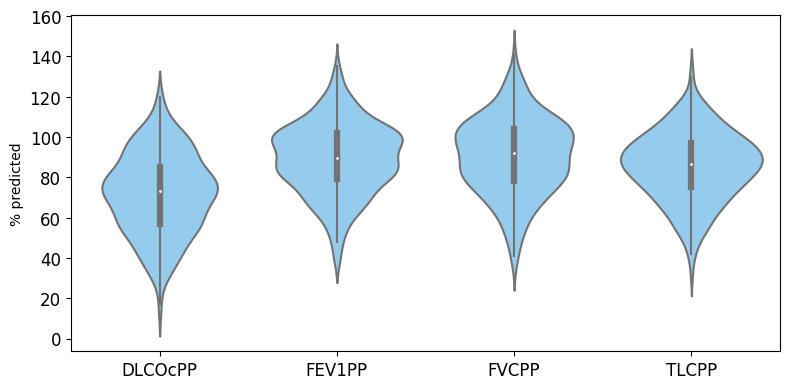

In [84]:
fig, ax = plt.subplots(figsize=(8, 4))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

# 选取需要的两列数据
data = df.loc[:, [ 'DLCOcPP', 'FEV1PP', 'FVCPP', 'TLCPP']]



# 创建小提琴图
sns.violinplot(data=data, color='lightskyblue', ax=ax)

# 设置第一个 y 轴的标签
ax.set_ylabel('% predicted')
ax.tick_params(axis='both', which='major', labelsize=12)
# # 隐藏左图的右边界
# # ax1.spines['right'].set_visible(False)
ax.tick_params(axis='y', labelright=False, labelleft=True, right=False, left=True)

# # 设置第二个 y 轴的标签
# ax2.set_ylabel('Liter')
# # ax2.tick_params(axis='both', which='major', labelsize=12)
# # 隐藏右图的左边界和y轴标签
# ax2.spines['left'].set_visible(False)
# ax2.spines['right'].set_visible(True)

# ax2.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)
# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_right()


# 调整子图之间的距离和布局
fig.tight_layout()
# gs.update(wspace=0.3)

# 显示图形
plt.show()

In [85]:
df.describe()

,Unnamed: 0,PatID,Torso-V,Lung-V,Vessel-V,Density85,alpha,beta,DLCOc,FEV1,FVC,TLC,DLCOcPP,FEV1PP,FVCPP,TLCPP
count,314.000000,3.140000e+02,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,158.187898,4.844758e+06,18.263087,4.511213,0.477646,-696.166561,-1.282804,10.157701,5.554449,2.617290,3.321385,4.909971,71.949045,89.315287,90.579618,85.621019
std,91.499540,2.977614e+06,3.616045,1.215982,0.263411,106.306034,0.203370,0.642971,1.923546,0.769566,0.969563,1.234392,20.098574,17.691155,18.978086,17.073034
min,0.000000,6.880000e+04,6.670418,1.693383,0.168139,-844.000000,-2.767700,8.924300,1.111000,0.797000,1.232000,1.928000,14.000000,39.000000,36.000000,32.000000
25%,79.250000,2.157768e+06,15.879673,3.650981,0.343016,-770.750000,-1.375750,9.674350,4.098000,2.047250,2.604500,4.110000,57.000000,79.000000,78.000000,75.000000
50%,158.500000,5.251858e+06,17.826263,4.446581,0.453067,-726.000000,-1.242200,10.072250,5.448500,2.549500,3.246500,4.861500,73.000000,89.500000,92.000000,86.500000
75%,236.750000,7.325453e+06,20.262486,5.264938,0.550776,-645.250000,-1.143125,10.508525,6.754000,3.093750,3.989750,5.706750,85.000000,102.000000,104.000000,97.000000
max,316.000000,9.939136e+06,30.264649,8.477541,2.971738,-317.000000,-0.959300,13.399000,13.760000,5.655000,6.650000,10.750000,120.000000,135.000000,141.000000,133.000000
